In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Nowy start random.
np.random.seed(42)

# Załaowanie danych.
heartr_disease = pd.read_csv('data/heart-disease.csv')

# Rozdzielenie danych na wejściowe 'X' i wyjściowe 'y'.
X = heartr_disease.drop('target', axis=1) # X = heartr_disease oprócz kolumny target (features, features variables, data)
y = heartr_disease['target'] # y = kolumna target (labels, targets, target variables)

# Rozdzielenie danych na treningowe i testowe.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Stworzenie obiektu clasyfikatora.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300)

# Dopasowanie drzew obiektu do danych. Zbudowanie drzewa decyzyjnego ze zbioru uczącego (X, y). Zbudowanie modelu ML.
clf.fit(X_train, y_train) 

# Przetestowanie na modelu danych testowych. Zwraca średnią dokładność dla podanych danych testowych i etykiet.
clf.score(X_test, y_test)

0.8524590163934426

## Dwa sposoby na predict
    * 'predict()'
    * 'predict_proba()'

## PREDICT

In [4]:
# Wyniki z modely ML.
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [5]:
# Wyniki prawdziwe testowe.
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [6]:
# Porównanie wyników.
y_preds == np.array(y_test)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [7]:
# Średnia porównnia wynmików.
np.mean(y_preds == y_test)

0.8524590163934426

In [8]:
# Dokładność klasyfikacji.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

## PREDICT_PROBA
Oszacowania prawdopodobieństwa. Zwrócone szacunki dla wszystkich klas są uporządkowane według etykiet klas.
Można uzyskać bardziej szczegółowe dane.

In [9]:
clf.predict_proba(X_test[:5])

array([[0.91      , 0.09      ],
       [0.4       , 0.6       ],
       [0.46666667, 0.53333333],
       [0.87      , 0.13      ],
       [0.19333333, 0.80666667]])

In [10]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

predict_proba() pokazuje wagowo w wierszu wynik predict(), np:
- pierwszy wiersz w predict_proba() pokazuje że w 91% będzie 0, co widać na pierwszej popzycji w predict()
- drugi wiersz w predict_proba() pokazuje że w 60% będzie 1, co widać na drugiej popzycji w predict()
- trzeci wiersz w predict_proba() pokazuje że w 53.333% będzie 1, co widać na trzeciej popzycji w predict()
- itd.

## Ocena modelu uczenia maszynowego:
1. Wbudowana w estymator metoda "score()".
2. Parametr "scoring".
3. Funkcja metryczna specyficzna dla problemu.
   
https://scikit-learn.org/stable/modules/model_evaluation.html

### Wbudowana w estymator metoda "score()".

In [11]:
np.random.seed(42)
# Rozdzielenie danych na wejściowe 'X' i wyjściowe 'y'.
X = heartr_disease.drop('target', axis=1) # X = heartr_disease oprócz kolumny target (features, features variables, data)
y = heartr_disease['target'] # y = kolumna target (labels, targets, target variables)
# Rozdzielenie danych na treningowe i testowe.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Stworzenie obiektu clasyfikatora.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300)
# Dopasowanie drzew obiektu do danych. Zbudowanie drzewa decyzyjnego ze zbioru uczącego (X, y). Zbudowanie modelu ML.
clf.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=300)

In [12]:
# Wynik jest na 100% ponieważ, sprawdzamy dane które zostały używe do uczenia, 
# ale przy użyciu n_estimators noższej wartości wcale tak nie musi być.
clf.score(X_train, y_train)

1.0

In [13]:
y_preds = clf.score(X_test, y_test)
y_preds

0.8524590163934426

### Parametr "scoring".

In [14]:
from sklearn.model_selection import cross_val_score 
np.random.seed(42)

In [15]:
clf.score(X_test, y_test)

0.8524590163934426

In [34]:
# Ocena wyniku poprzez walidację krzyżową. Cross-validation.
# zwykły score jest robiony na podstawie X_testu, cross_val_score dzieli wszystkie dane przez 'cv' i każdą porcje testuje.
# https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
np.random.seed(42)
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [35]:
np.random.seed(42)
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [18]:
# cross_val_score() - zapobiega przypodkowemu dobremu wynikowi z score() - bo ocenia model ML na podstawie wszystkich danych.

In [37]:
np.random.seed(42)
cross_val_score(clf, X, y, cv=5, scoring='accuracy')

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [39]:
np.random.seed(42)
cross_val_score(clf, X, y, cv=5, scoring='precision')

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [41]:
np.random.seed(42)
cross_val_score(clf, X, y, cv=5, scoring='recall')

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

## Wskaźniki oceny.
1. Accuracy (Precyzja).
2. Area under ROC curve (Obszar pod krzywą ROC).
3. Confusion matrix (Macierz pomyłek).
4. Classification report (Raport klasyfikacyjny).

## **Accuracy (Precyzja).**

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
clf = RandomForestClassifier(n_estimators=100)
cvs = cross_val_score(clf, X, y, cv=5)
cvs

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [20]:
print(f'{np.mean(cvs) * 100:.2f}%') # średnia 

82.48%


## **Area under receiver operating characteristic curve (Obszar pod krzywą ROC).**

ROC curves are a comparison of a model's true positive (tpr) versus a models false positive rate (fpr)

Krzywe ROC są porównaniem wskaźnika wyników prawdziwie pozytywnych (tpr) modelu ze wskaźnikiem wyników fałszywie pozytywnych (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predict 0 when truth is 0
* False negative = model predict 0 when truth is 1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import roc_curve
clf.fit(X_train, y_train) 
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.14, 0.86],
       [0.4 , 0.6 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.43, 0.57]])

In [22]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57])

In [23]:
# Calculate fpr, tpr and thresholds

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

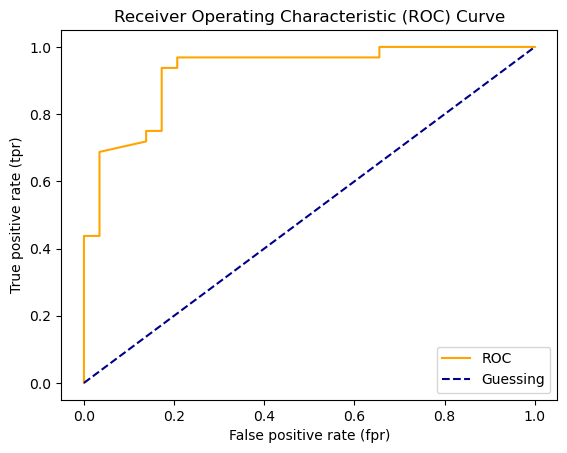

In [25]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve  
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    # Custimaze the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)
    

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9251077586206896

## **Confusion matrix.** 
Macierz która porównuje wyniki testowe z przewidywanymi.

In [27]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [28]:
pd.crosstab(y_test, y_preds, rownames=['Actual Label'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,4,28


* (0, 0) -> model przewiduje 0 i jest 0
* (1, 1) -> model przewiduje 1 i jest 1
* (0, 1) -> model przwiduje 0 a jest 1
* (1, 0) -> model przwiduje 1 a jest 0

In [29]:
# import seaborn as sns
# sns.set(font_scale=1.5)
# conf_mat = confusion_matrix(y_test, y_preds)
# sns.heatmap(conf_mat);

In [30]:
# Instala cja pakietu z poziomy jupiter nootebok
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

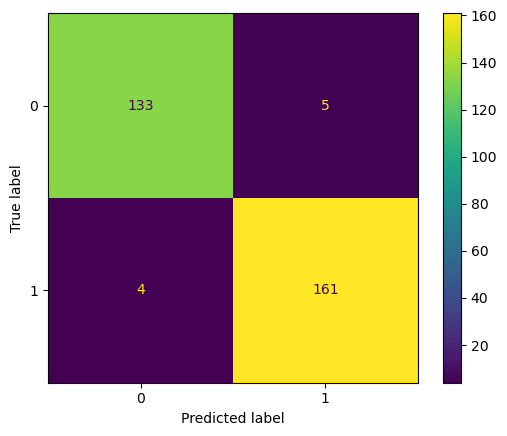

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

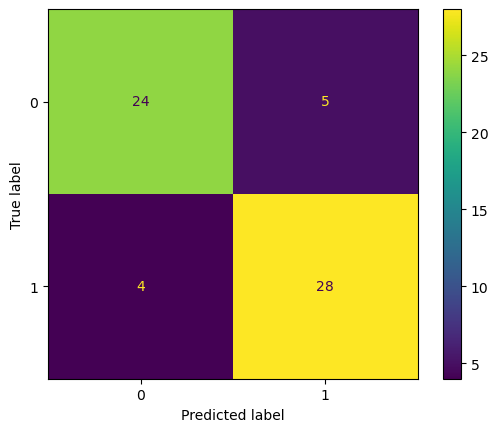

In [32]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

## **Classification report**

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

